## 1.Откроем файл с данными и изучим общую информацию.

### Импортируем необходимые библиотеки. Считаем данные из csv-файла в датафрейм и сохраним в переменную data.

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv/')
except:
    data = pd.read_csv("https://code.s3.yandex.net/datasets/games.csv")

### Выведем на экран первые 5 строчек датафрейма data.

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Выведем на экран основную информацию о датафрейме data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Проверим наличие явных дубликатов в датафрейме data.

In [5]:
data.duplicated().sum()

0

*Рассмотрев исходные данные видно, что необходимо изменить названия столбцов - привести все названия к нижнем регистру. Зaполнить пропущенные значения в столбцах "Critic_Score", "User_Score", "Rating". Заменить тип данных в столбцах "Year_of_Release", "User_Score". Дубликатов в данных не обнаружено.*

## 2.Подготовка данных

### Изменим названия столбцов.

In [6]:
# Выведем на экран названия столбцов
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
# Приведем названия столбцов к нижнему регистру 
data.columns = data.columns.str.lower()

In [8]:
# Проверим
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Выведем перечень уникальных значений столбца "user_score".

In [9]:
data['user_score'].unique() 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В перечне уникальных значений есть интересное значение - 'tbd'. TBD - аббревиатура от английского To Be Determined означает  данные будут определены, используется если какая-то информация еще не определена. Поэтому будем считать данное значение "tbd" как пропуск, с помощью метода to_numeric приведем тип данных данного столбца к числовому и параллельно строки 'tbd' заменятся.

In [10]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [11]:
# проверим
data['user_score'].unique() 

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

### Обработаем пропущенные значения в столбцах.

In [12]:
# Выведем количество пропущенных значений для каждого столбца.
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Пропусков в столбцах "name", "year_of_release", "genre" не много. Все строки с пропущенными значениями необходимо удалить, т.к. нет возможно заменить эти значения. Пропусков в столбцах "critic_score", "user_score" и "rating" очень много. Заполнить их также не представляется возможным, как и удалить. Заменим пропущенные значения на '-1'. Так мы сможем учесть все данные при дальнейшем анализе.

In [13]:
# Удалим пропуски в столбцах "name", "year_of_release" и "genre".
data.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)

In [14]:
# В столбцax "critic_score", "user_score" и "rating" заменим все пропуски на 'unknown'
for column in ['critic_score', 'user_score', 'rating']:
    data.loc[data[column].isna(), column] = '-1'

In [15]:
# Проверим количество пропущенных значений.
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

В данных было достаточно большое количество пропусков. В столбце "name" пропуски скорее всего появились потому, что при заведении данных их забыли указать, поэтому ячейка оказалась пустой.

Пропуски в столбце "year_of_release" могли возникнуть из-за того, что при заполнении данных об игре точная дата выхода игры была не определена или просто забыли их указать.

Пропуски в столбеце "genre" скорее всего возникли из-за того, что при заполнении данных об игре не смогли определить к какому именно жанру относится компьютерная игра.

В столбцах "critic_score", "user_score", "rating" появились пропуски из-за отсутствия оценок, также возможно игры были недавно вышедшие и соотвественно еще не получили свои оценки.

### Преобразуем тип данных в некоторых столбцах.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  object 
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.5+ MB


Для проведения дальнейшего анализа необходимо в столбце "year_of_release" заменить тип данных с float на int (год выпуска не может быть вещественным числом). В столбцах "critic_score", "user_score" заменить тип данных object на float (судя по описанию столбцов - оценка критиков и пользователей - тип данных не может являться строкой.)

In [17]:
# Приведим столбец "year_of_release" к целочисленному типу
data['year_of_release'] = pd.to_numeric(data['year_of_release'], downcast='integer')
# Приведем столбцы "critic_score", "user_score" к вещественному типу
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [18]:
# Проверим типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int16  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int16(1), object(4)
memory usage: 1.4+ MB


### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [19]:
# в столбец "total_sales" суммируем значения столбцов "na_sales", "eu_sales", "jp_sales", "other_sales" 
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
# выведем первые 10 строк на экран
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,-1,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,-1,28.31


*В данном разделе проекта привели в соотвествие название столбцов, обработали пропуски в столбцах, преобразовали данные в нужные типы, посчитали суммарные продажи компьютерных игр во всех регионах. Подготовили данные для дальнейшего анализа.*

## 3.Проведем иследовательский анализ данных.

### Посчитаем, сколько игр было выпущено в разные годы

In [20]:
# посчитаем кол-во игр за каждый год
year_count = data.groupby('year_of_release')['name'].count()
year_count

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

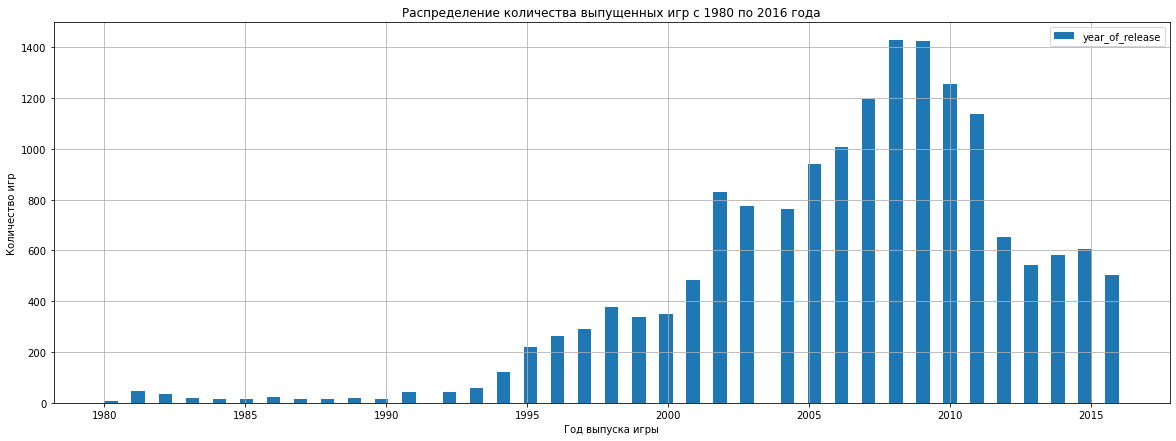

In [21]:
# построим график для наглядности
data.plot(kind='hist', grid=True, style='o-', title='Распределение количества выпущенных игр с 1980 по 2016 года',
          y='year_of_release', bins=75, figsize=(20,7))
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество игр')
plt.show()

На графике хорошо просматривается увеличение числа выпущенных игр после 1993 года, и это увеличение продолжалось до 2009 года, после чего пошло резкое снижение в 2012 году.

### Посмотрим, как менялись продажи по платформам.

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.  
Посмотрим, как менялись продажи по платформам и за какой характерный срок появляются новые и исчезают старые платформы.

In [22]:
# Сгруппируем платформы и их суммарные продажи, отсортируем по убыванию 
platform_sum = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)
platform_sum.head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


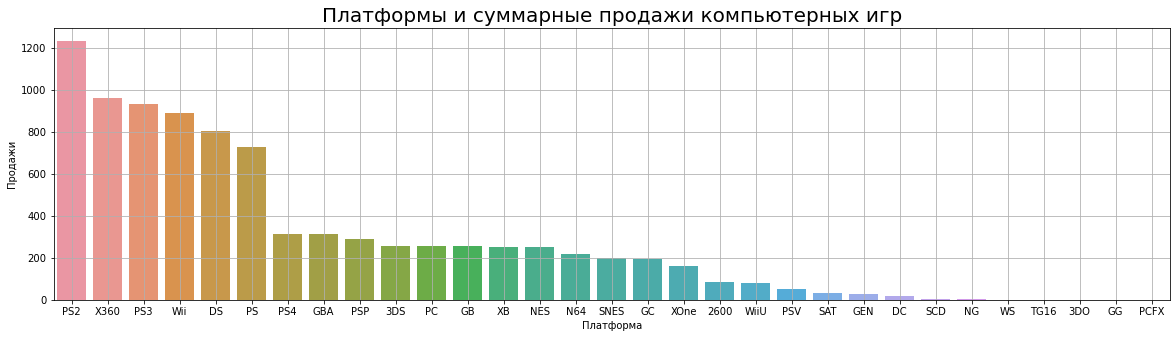

In [23]:
# Построим гистограмму для наглядности
plt.figure(figsize=(20, 5))
plt.title('Платформы и суммарные продажи компьютерных игр', fontsize=20)
sns.barplot(x=platform_sum.index, y=platform_sum['total_sales'])
plt.ylabel('Продажи')
plt.xlabel('Платформа')
plt.grid(True)
plt.show()

Платформы PS2, X360, PS3, WII, DS, PS - самые популярные платформы с наибольшим количеством проданных игр.
Построим для каждой платформы отдельный график, как менялись продажи игр по годам.

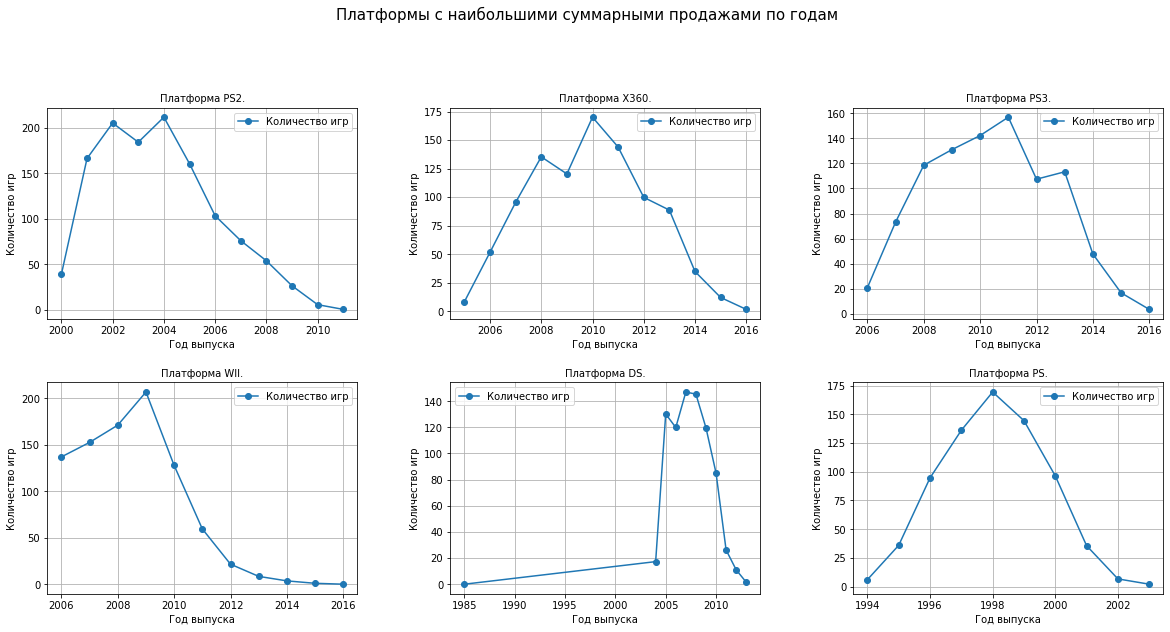

In [24]:
position = 0
top_platform = platform_sum.reset_index()['platform'].head(6)
plt.figure(figsize=[20, 14])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle('Платформы с наибольшими суммарными продажами по годам', fontsize=15)
for name_of_platform in top_platform:
    position += 1
    pvt = data.query('platform == @name_of_platform').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    plt.subplot(3, 3, position)
    plt.title(f'Платформа {name_of_platform.upper()}.', fontsize=10)
    plt.plot(pvt, 'o-',label='Количество игр', alpha=1)
    plt.ylabel('Количество игр')
    plt.xlabel('Год выпуска')
    plt.grid(True)
    plt.legend()
plt.show()

Графики наглядно представляют поведение платформы за время ее существования, все ее взлеты и падения. Есть платформы которые прекратили свое существование - PS2, DS, PS. Почти все платформы имеют снижение количества проданных игр к 2016 году.
Каков же срок жизни платформы? Для этого посчитаем среднюю продолжительность жизни платформы.

In [25]:
list_platform = []
for name_platform in top_platform:
    life_cycle = data.query('(platform == @name_platform)')\
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').count()
    list_platform.append(life_cycle)
mean_platform = int(np.mean(list_platform))
mean_platform

11

Средняя продолжительность жизни платформы составяет - 11 лет. 
Для нашего анализа, данные за весь предоставленный период не нужны. Нужны только те, которые отражают тенденции последних лет. Соотвественно для построения прогноза на 2017год мы возьмем актуальный период с 2015-2016г..

### Посмотрим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

In [26]:
# определим данные актуального периода
data_forecast = data.query('year_of_release >= 2015')

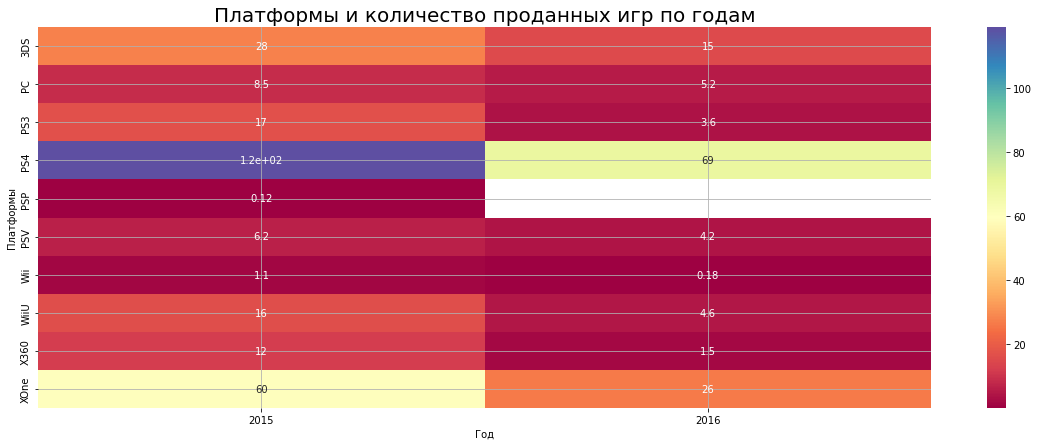

In [27]:
# построим тепловую карту с данными по годам и названиями платформ
plt.figure(figsize=(20, 7))
plt.title('Платформы и количество проданных игр по годам', fontsize=20)
sns.heatmap(data_forecast.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum'),\
            annot=True, cmap="Spectral")
plt.ylabel('Платформы')
plt.xlabel('Год')
plt.grid(True)
plt.show()

In [28]:
# посмотрим сколько платформ было в первоначальных данных
len(data['platform'].unique())

31

В актуальном периоде, который мы выбрали, из 31 платформы остались только 10. Из этих 10 платформ потенциально прибыльными платформами можно считать - PS4, XOne, 3DS. Платформа PSP уже прекратила свое существование, её продажи равны нулю.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

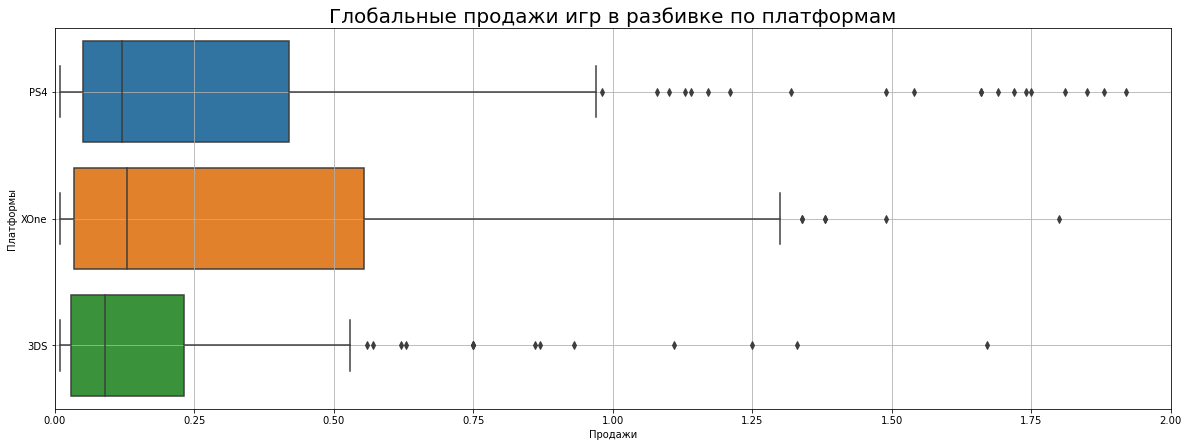

In [29]:
# создадим список из потенциально прибыльных платформ
list_platforms = ['PS4', 'XOne', '3DS']
# сделаем срез данных по прибыльным платформам 
data_list_platforms = data_forecast[data_forecast['platform'].isin(list_platforms)]
# построим ящик с усами
plt.figure(figsize=(20, 7))
plt.xlim(0, 2)
plt.title('Глобальные продажи игр в разбивке по платформам', fontsize=20)
sns.boxplot(x='total_sales', y='platform', data=data_list_platforms, orient='h')
plt.ylabel('Платформы')
plt.xlabel('Продажи')
plt.grid(True)
plt.show()

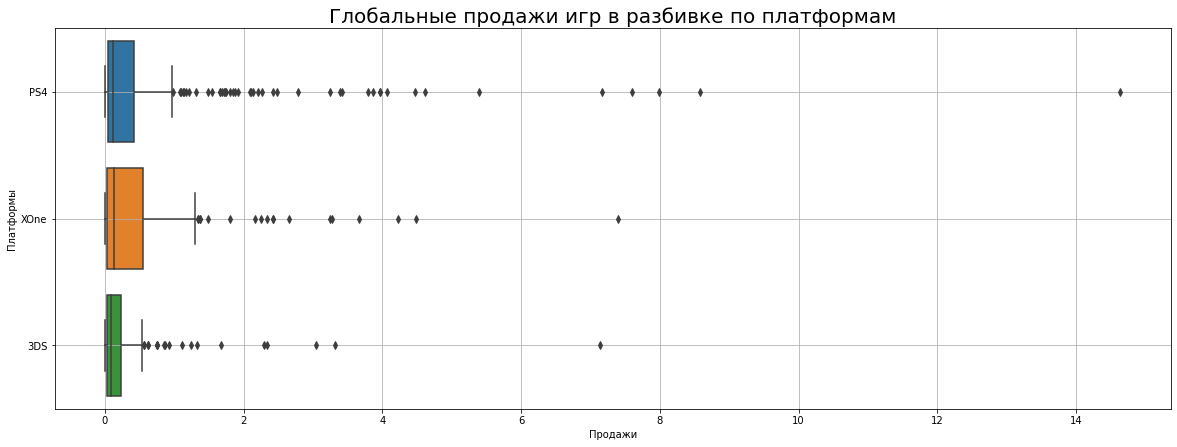

In [30]:
# для большей визуализации построим график иначе
plt.figure(figsize=(20, 7))
plt.title('Глобальные продажи игр в разбивке по платформам', fontsize=20)
sns.boxplot(x='total_sales', y='platform', data=data_list_platforms, orient='h')
plt.ylabel('Платформы')
plt.xlabel('Продажи')
plt.grid(True)
plt.show()

Популярна платформа можно определить по объему продаж, входящему в межквартильный размах и медианному значению, чем они выше тем популярнее платформа. 
Исходя из графиков видно, что большего всего продаются игры на платформах - PS4, XOne. Медиана у них находится дальше. Так же размах усов для ящиков шире, чем у платформы 3DS. Выбросы и аномалии находятся за приделами усов.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

In [31]:
# сделаем срез нужных данных без учета позиций по которым отсутсвуют оценки
data_ps4 = data_forecast[(data_forecast['platform'] == 'PS4') & (data_forecast['user_score'] >= 0)\
                           & (data_forecast['critic_score'] >= 0)]

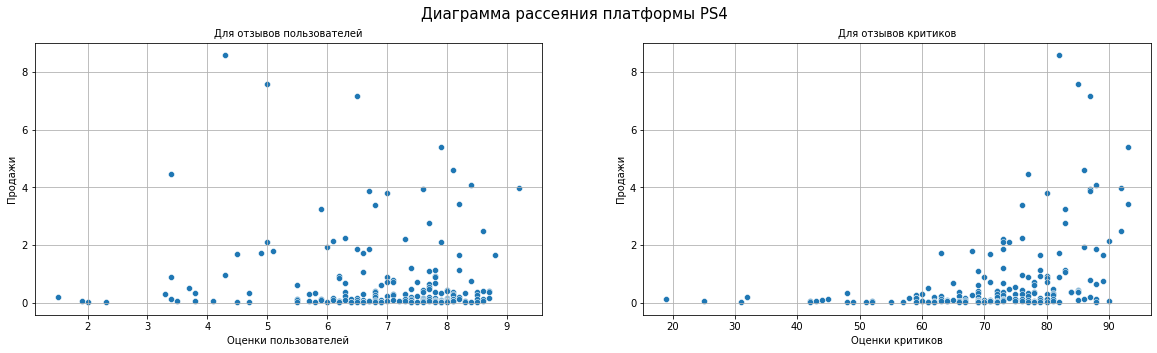

In [32]:
# заданим размеры и название 
plt.figure(figsize=(20, 5))
plt.suptitle('Диаграмма рассеяния платформы PS4', fontsize=15)
# построим диаграмму рассеяния между отзывами критиков и продажами
plt.subplot(1, 2, 2)
plt.title('Для отзывов критиков', fontsize=10)
sns.scatterplot(x='critic_score', y='total_sales', data=data_ps4)
plt.ylabel('Продажи')
plt.xlabel('Оценки критиков')
plt.grid(True)
# построим диаграмму рассеяния между отзывами пользователей и продажами
plt.subplot(1, 2, 1)
plt.title('Для отзывов пользователей', fontsize=10)
sns.scatterplot(x='user_score', y='total_sales', data=data_ps4)
plt.ylabel('Продажи')
plt.xlabel('Оценки пользователей')
plt.grid(True)
plt.show()

In [33]:
# посчитаем коэффиценты корреляции
cor_critic_score = data_ps4['total_sales'].corr(data_ps4['critic_score'])
cor_user_score = data_ps4['total_sales'].corr(data_ps4['user_score'])
# выведем значения на экран
print(f'\nКоэффицент корреляции для отзывов критиков - {cor_critic_score:.2f}')
print(f'\nКоэффицент корреляции для отзывов пользователей - {cor_user_score:.2f}')


Коэффицент корреляции для отзывов критиков - 0.39

Коэффицент корреляции для отзывов пользователей - -0.06


Диаграмма рассеяния и коэффицент корреляции показывают что, оценки пользователей никак не влияют на продажи игр, так как значение почти нулевое. 
А вот оценки критиков сильно влияют на продажи игр, это видно и по диаграмме и по коэффиценту корреляция в 39 процентов. Получается чем выше оценка критиков, тем больше происходит продаж.

### Соотнесем выводы с продажами игр на других платформах.

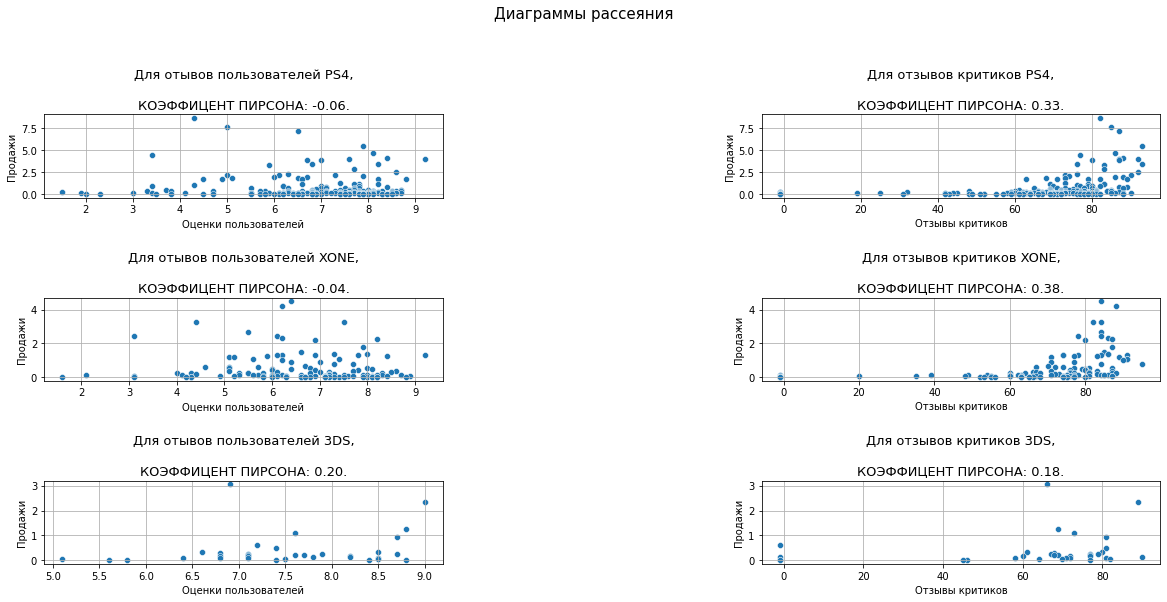

In [34]:
position = 0
plt.figure(figsize=[20,15])
plt.subplots_adjust(wspace=0.8, hspace=1.2)
plt.suptitle('Диаграммы рассеяния', fontsize=15)

for name_platform in list_platforms:
    position += 1
    data_console = data_forecast[(data_forecast['platform'] == name_platform) \
                                      & (data_forecast['user_score'] >= 0)]    
    plt.subplot(5, 2, position)
    cor_user_score = data_console['total_sales'].corr(data_console['user_score'])
    plt.title(f'Для отывов пользователей {name_platform.upper()},\n\nКОЭФФИЦЕНТ ПИРСОНА: {cor_user_score:.2f}.', fontsize=13)
    sns.scatterplot(x='user_score', y='total_sales', data=data_console)
    plt.xlabel('Оценки пользователей')
    plt.ylabel('Продажи')
    plt.grid(True)
    
    position += 1
    plt.subplot(5, 2, position)
    cor_critic_score = data_console['total_sales'].corr(data_console['critic_score'])
    plt.title(f'Для отзывов критиков {name_platform.upper()},\n\nКОЭФФИЦЕНТ ПИРСОНА: {cor_critic_score:.2f}.', fontsize=13)
    sns.scatterplot(x='critic_score', y='total_sales', data=data_console)
    plt.xlabel('Отзывы критиков')
    plt.ylabel('Продажи')
    plt.grid(True)
plt.show()

Исходя из графиков расеяния можно сказать, что объем продаж довольно резко возрастает при оценке критиков.
Зависимость продаж от оценок пользователей менее выраженна. Оценки пользователей влияют на продажи только у платформы 3DS.

### Посмотрим на общее распределение игр по жанрам.

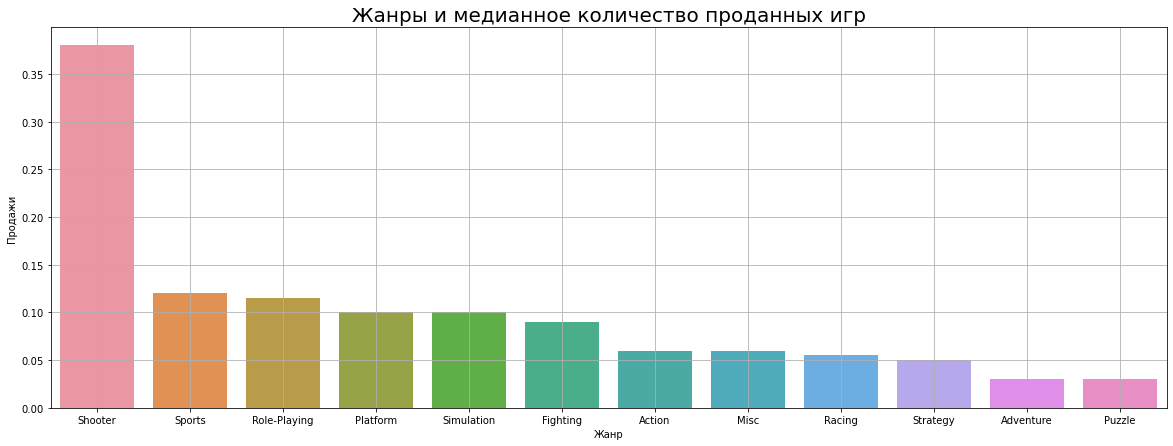

In [35]:
# Сгруппируем жанры, их медианное кол-во, отсортируем по убыванию 
genre_total_sales = data_forecast.pivot_table(index='genre', values='total_sales', aggfunc='median')\
.sort_values(by='total_sales', ascending=False).reset_index()
# построим гистограмму
plt.figure(figsize=(20, 7))
plt.title('Жанры и медианное количество проданных игр', fontsize=20)
sns.barplot(x='genre', y='total_sales', data=genre_total_sales)
plt.ylabel('Продажи')
plt.xlabel('Жанр')
plt.grid(True)
plt.show()

Самый популярный жанр - "Shooter", у наибольшая доля продаж. Наименьшее количество игр в жанре "Puzzle".

*Средний срок жизни игровой платформы составляет 11 лет. Необходимо постоянно создавать новые платформы, что бы соответствовать тенденциям рынка. Перспективными платформами на период с 2017 года можно считать: 'PS4', 'XOne'. Они появились относитеьно недавно, и имею положительную динамику роста количества продаж.*
*Мнение критиков и пользователей оказывает различное влияние на продажи компьютерных игр. Поэтому при планировании на это стоит обратить внимание, чтобы мотивировать пользователей к покупке компьютерных игр.*
*Пользователи предпочитают следующие жанры: "Shooter", "Sports", "Role-playing", "Platform", " Simulation".*

## 4.Составим портрет пользователя следующих регионов - Северная Америка, Европа и Япония.

### Определим для пользователя каждого региона самые популярные платформы (топ-5).

In [36]:
# выбока для Северной Америке
forecast_na = data_forecast.loc[:, 'name':'genre']
forecast_na['na_sales'] = data_forecast['na_sales']
forecast_na['rating'] = data_forecast['rating']
# выборка для Европеского региона 
forecast_eu = data_forecast.loc[:, 'name':'genre']
forecast_eu['eu_sales'] = data_forecast['eu_sales']
forecast_eu['rating'] = data_forecast['rating']
# выборка для Японии
forecast_jp = data_forecast.loc[:, 'name':'genre']
forecast_jp['jp_sales'] = data_forecast['jp_sales']
forecast_jp['rating'] = data_forecast['rating']

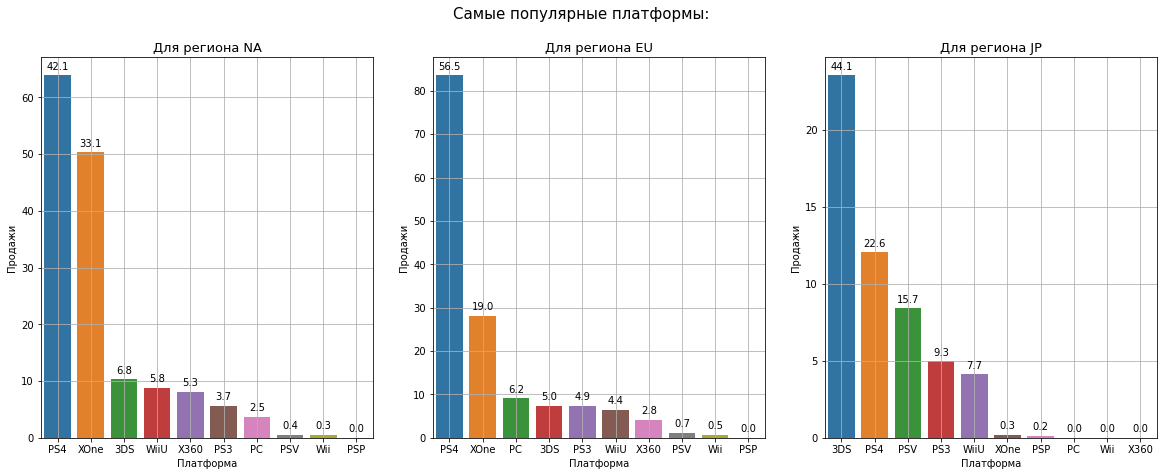

In [37]:
position = 0
plt.figure(figsize=[20, 7])
plt.subplots_adjust(wspace=0.18, hspace=0.3)
plt.suptitle('Самые популярные платформы:', fontsize=15)
for region, forecast_region in {'na_sales': forecast_na, 'eu_sales': forecast_eu, 'jp_sales': forecast_jp}.items():
    position += 1
    all_sales_in_region = forecast_region[region].sum()
    total_sales_regin_by_platform = forecast_region.pivot_table(index='platform', values=region, aggfunc='sum')\
    .sort_values(by=region, ascending=False).reset_index()
    plt.subplot(1, 3, position)
    plt.title(f'Для региона {region[0:2].upper()}', fontsize=13)
    pop_platform = sns.barplot(x='platform', y=region, data=total_sales_regin_by_platform)
    for p in pop_platform.patches:
        pop_platform.annotate(format(p.get_height() / all_sales_in_region * 100, '.1f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.ylabel('Продажи')
    plt.xlabel('Платформа')
    plt.grid(True)
plt.show()    

Для Северной Америки самыми популярными платформами являются:

- PS4 доля продаж соствляет 42.1%.
- XONE доля продаж соствляет 33.1%.
- 3DS доля продаж соствляет 6.8%.
- WIIU доля продаж соствляет 5.8%.
- X360 доля продаж соствляет 5.3%.

Для Европейского региона самыми популярными платформами являются:

- PS4 доля продаж соствляет 56.5%.
- XONE доля продаж соствляет 19.0%.
- PС доля продаж соствляет 6.2%.
- 3DS доля продаж соствляет 5.0%.
- PS3 доля продаж соствляет 4.9%.

Для Японии самыми популярными платформами являются:

- 3DS доля продаж соствляет 44.1%.
- PS4 доля продаж соствляет 22.6%.
- PSV доля продаж соствляет 15.7%.
- PS3 доля продаж соствляет 9.3%.
- WIIU доля продаж соствляет 7.7%.

### Определим для пользователя каждого региона cамые популярные жанры (топ-5).

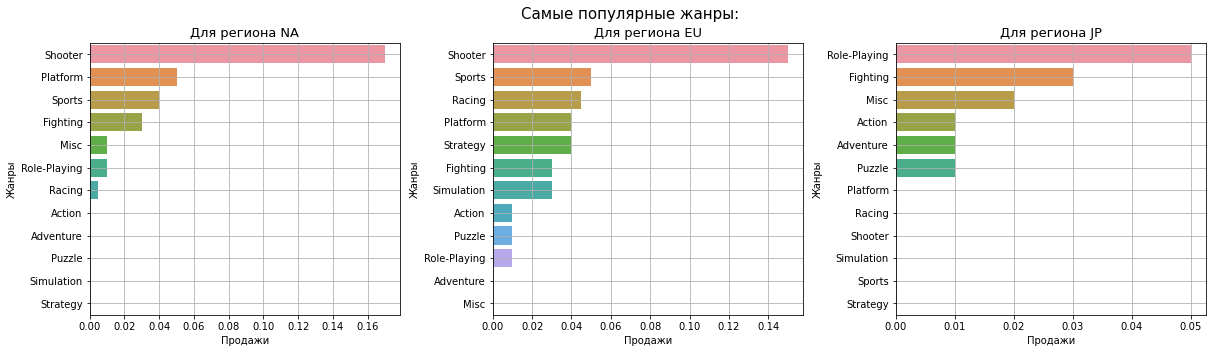

In [38]:
position = 0
plt.figure(figsize=[20, 5])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle('Самые популярные жанры:', fontsize=15)
for region, forecast_region in {'na_sales': forecast_na, 'eu_sales': forecast_eu, 'jp_sales': forecast_jp}.items():
    position += 1
    total_sales_regin_by_genre = forecast_region.pivot_table(index='genre', values=region, aggfunc='median')\
    .sort_values(by=region, ascending=False).reset_index()
    plt.subplot(1, 3, position)
    plt.title(f'Для региона {region[0:2].upper()}', fontsize=13)
    sns.barplot(x=region, y='genre', data=total_sales_regin_by_genre)
    plt.ylabel('Жанры')
    plt.xlabel('Продажи')
    plt.grid(True)
plt.show()    

Для Северной Америки самыми популярными жанрами являются:
- Shooter, Platform, Sports, Fighting, Misc. 

Для Европейского региона самыми популярными жанрами являются:
- Shooter, Sports, Racing, Platform, Strategy.

Для Японии самыми популярными жанрами являются:
- Role-Playing, Fighting, Misc, Action, Adventure.

### Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе?

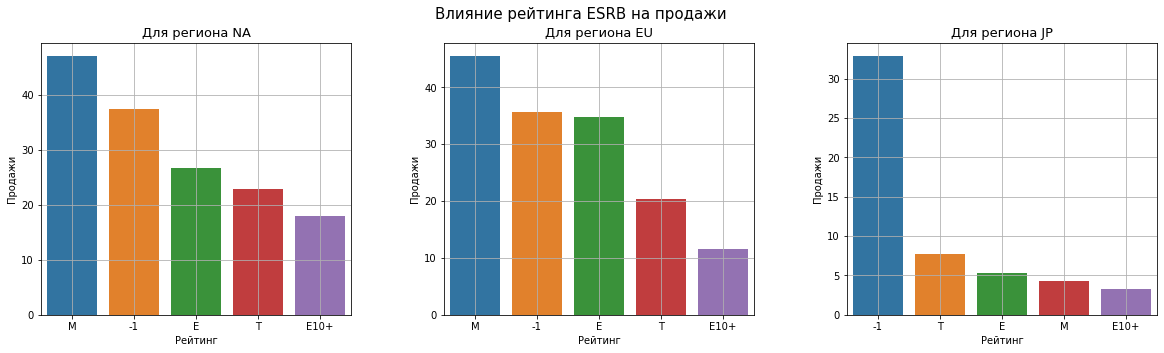

In [39]:
position = 0
plt.figure(figsize=[20, 5])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle('Влияние рейтинга ESRB на продажи', fontsize=15)
for region, forecast_region in {'na_sales': forecast_na, 'eu_sales': forecast_eu, 'jp_sales': forecast_jp}.items():
    position += 1
    plt.subplot(1, 3, position)
    pvt = forecast_region.pivot_table(index='rating', values=region, aggfunc='sum')\
    .reset_index().sort_values(by=region, ascending=False).reset_index()
    plt.title(f'Для региона {region[0:2].upper()}', fontsize=13)
    sns.barplot(x='rating', y=region, data=pvt)
    plt.xlabel('Рейтинг')
    plt.ylabel('Продажи')
    plt.grid(True)
plt.show()    
    

В Северной Америке и Европейском регионе самыми популярными являются игры для взрослых.
В Японии самыми популярными являются игры для подросков.

*Портрет ползователя из Северной Америки:
Чаще всего играет в игры для взрослых, основаных на стрельбе и уничтожении врагов, на платформе PS4.*

*Портрет ползователя из Европейского региона:
Любит играть в игры для взрослых, основаных на стрельбе и уничтожении врагов, на платформе PS4.*

*Портрет ползователя из Японии:
Любит поиграть в игры для подростков, основанных на элементах игрового процесса традиционных настольных ролевых игр, на платформе 3DS.* 

## 5.Проверим гипотезы.

### Проверим гипотезу: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

Сформулируем нулевую и альтернативную гипотезы:

H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н_1: Средние пользовательские рейтинги платформ Xbox One и PC разные. 


In [40]:
# определим совокупности для платформы Xbox One
xbox_one_results = data_forecast[(data_forecast['platform']=='XOne')&(data_forecast['user_score'] >= 0) \
                                 & (data_forecast['user_score'] >= 0)]['user_score']
# определим совокупности для платформы PC
pc_results = data_forecast[(data_forecast['platform']=='PC')&(data_forecast['user_score'] >= 0) \
                           & (data_forecast['user_score'] >= 0)]['user_score']
# вызов метода для проверки гипотезы
results = st.ttest_ind(xbox_one_results, pc_results, equal_var=False)
# зададим значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран
print('p-value: ', results.pvalue)
# условный оператор с вызовом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value:  0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


Отсюда следует, что пользовательские рейтинги платформ Xbox One и PC не различаются.

### Проверим вторую гипотезу: "Средние пользовательские рейтинги жанров Action и Sports разные".

Сформулируем нулевую и альтернативную гипотезы:

H_0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Н_1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [41]:
# определим совокупности для жанра Action
action_results = data_forecast[(data_forecast['genre']=='Action')&(data_forecast['user_score'] >= 0)\
                                & (data_forecast['user_score'] >= 0)]['user_score']
# определим совокупности для жанра Sports
sports_results = data_forecast[(data_forecast['genre']=='Sports')&(data_forecast['user_score'] >= 0) \
                                & (data_forecast['user_score'] >= 0)]['user_score']
# вызов метода для проверки гипотезы
results = st.ttest_ind(action_results, sports_results, equal_var=False)
# зададим значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран
print('p-value:', results.pvalue)
# условный оператор с вызовом строки с ответом
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 5.97163549920592e-10
Отвергаем нулевую гипотезу


Отсюда следует, что пользовательские рейтинги жанров Action и Sports различаются.

*Гипотезы проверили с помощью t-теста для двух независимых выборок, методом ttest_ind. Пороговое значение alpha взяли в размере 5% (общепринятое значение).* 
*В первой гипотезе:
Результат говорит о том, что нулевую гипотезу не удалось опровергнут.
Во второй гипотезе:
Результат говорит о том, что нулевая гипотеза отвергается.*

## 6.Общий вывод

*Для определения потенциально популярного продукта и планирования рекламных компаний стоит учитывать следующее:*

*1.	Популярность платформ, для того чтобы получить максимальную выгоду.*

*2.	Популярность жанра, для максимального охвата аудитории в различных регионах.*

*3.	Мнение критиков, чтобы привлечь дополнительную аудиторию игроков.*

*4.	Популярность возрастного рейтинга в зависимости от региона, чтобы получить максимальную прибыль при продаже компьютерных игр.*

*Перспективные направления для определенных регионов:*

*1.	Северная Америка. Плафторма: PS4, XOne, 3DS. Жанр: Shooter, Platform,  Sports.  Рейтинг: «для взрослых», «для всех», «для подростков».*

*2.	Европейский регион. Плафторма: PS4, XOne, PC. Жанр: Shooter, Sports, Racing.  Рейтинг: «для взрослых», «для всех», «для подростков».*

*3.	Япония. Плафторма: 3DS, PS4, PSV. Жанр: Role-playing, Fighting, Misc. Рейтинг: «для подростков», «для всех», «для взрослых».*

*Чтобы в 2017 году получить максимальную прибыль от продажи компьютерных игр, необходимо сделать ставку на игры, в жанре Shooter, с рейтингом «Для взрослых», на платформе PS4. Также стоит обратить внимание на игры в жанре Sports, для платформы PS4, с рейтингом "для всех" и игры в жанре Shooter, с рейтингом «Для взрослых», но уже для платформы XOne.*
